# Predictive Modeling for Data Professional Salaries

### About the Dataset

The Kaggle dataset provides a comprehensive overview of individuals' employment details, encompassing job titles, salaries, currencies, locations, and company attributes. Boasting over 7,000 observations across various years, it presents a wealth of data for thorough analysis. Notably, features like experience level, employment type, and company size offer critical insights into the determinants of salaries within the realms of business intelligence, data management, and data science. Through meticulous exploration of this dataset, we aim to unearth meaningful trends, patterns, and correlations. These findings will serve as the bedrock for constructing a robust predictive model, facilitating precise estimation of salaries. Ultimately, our objective is to realize a vision of accurate salary estimation within these professional domains.

### Mission

Our mission is to utilize machine learning techniques to analyze the dataset and build a robust predictive model. By identifying key factors such as job title, experience level, employment type, and company characteristics, we aim to create a tool that provides valuable salary predictions for professionals in these domains. Our ultimate goal is to assist both job seekers and employers in making informed decisions regarding salary negotiations and compensation packages.

### Vision

Our aim is to create a predictive model that precisely forecasts salaries for professionals working in business intelligence, data management, and data science. Leveraging a comprehensive dataset sourced from Kaggle, we seek to extract valuable insights to inform the model's development. By integrating these insights, our goal is to produce accurate salary estimations tailored to individuals within these specialized fields.

In [1]:
#!pip install scikit-learn==1.5.0

In [2]:
#importlibraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('salaries.csv')
data


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
print('shape of the dataset:{}'.format(data.shape))
print('-'*35)
data.info()

shape of the dataset:(7974, 11)
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974 entries, 0 to 7973
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7974 non-null   int64 
 1   experience_level    7974 non-null   object
 2   employment_type     7974 non-null   object
 3   job_title           7974 non-null   object
 4   salary              7974 non-null   int64 
 5   salary_currency     7974 non-null   object
 6   salary_in_usd       7974 non-null   int64 
 7   employee_residence  7974 non-null   object
 8   remote_ratio        7974 non-null   int64 
 9   company_location    7974 non-null   object
 10  company_size        7974 non-null   object
dtypes: int64(4), object(7)
memory usage: 685.4+ KB


In [5]:
# checking for missing values
print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [6]:
# check for duplicates
data.duplicated().sum()

3281

In [7]:
# drop all duplicates
data = data[~data.duplicated()]
print(data.duplicated().sum())

0


##### All variable look great

# Exploratory Data Analysis

### Work year

In [8]:
# find the different years of the data
print(data['work_year'].unique())

print("------------------------")

# find which year had the most workers
print(data['work_year'].value_counts())



print("-----------------------")

# percentage wise
print(data['work_year'].value_counts(normalize= True)*100)

[2023 2020 2022 2021]
------------------------
work_year
2023    3291
2022    1111
2021     216
2020      75
Name: count, dtype: int64
-----------------------
work_year
2023    70.125719
2022    23.673556
2021     4.602600
2020     1.598125
Name: proportion, dtype: float64


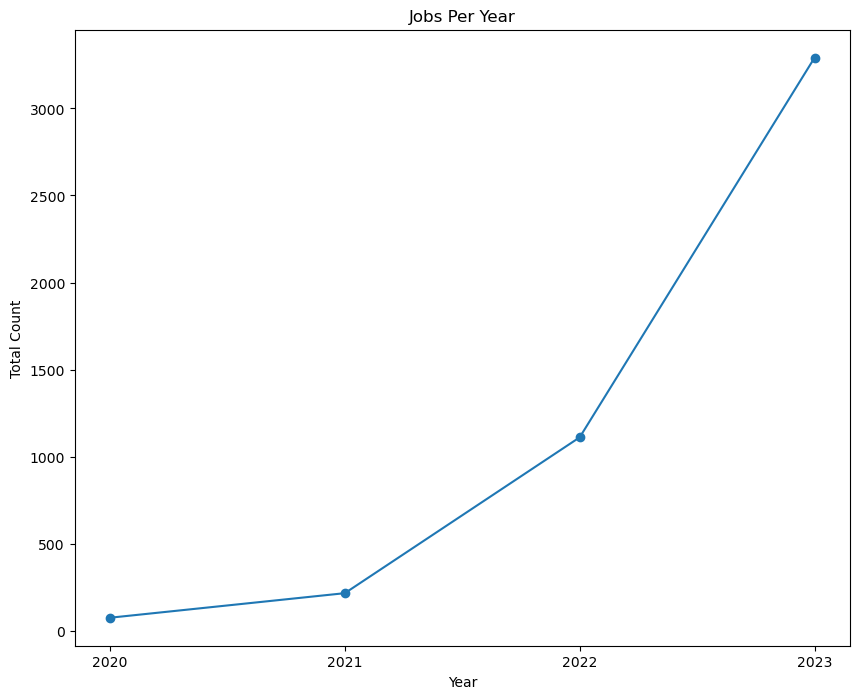

In [9]:
# visualize 
plt.figure(figsize= (10,8))
data['work_year'].value_counts().sort_values().plot(marker = "o")
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Jobs Per Year')
plt.xticks([2020, 2021, 2022,2023],['2020', '2021', '2022', '2023']);
plt.xticks(rotation=0);

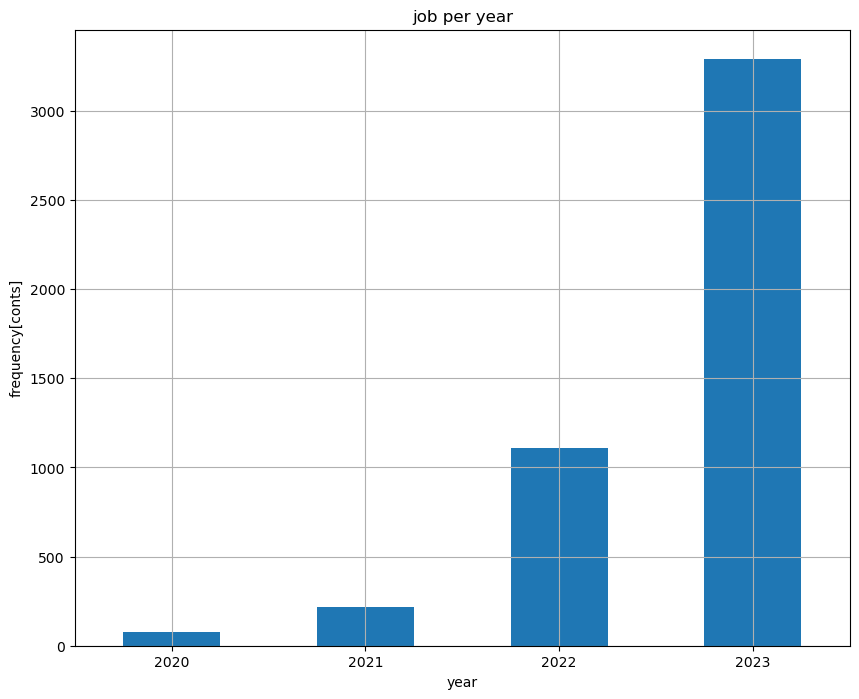

In [10]:
plt.figure(figsize= (10,8))
data['work_year'].value_counts().sort_values().plot(kind="bar")
#label the chart
plt.xlabel("year")
plt.ylabel('frequency[conts]')
plt.title('job per year')
plt.grid()
plt.xticks(rotation=0);

It's plausible that the lower number of employment records in 2020 compared to other years could be attributed to the COVID-19 pandemic. The pandemic had a significant impact on businesses worldwide, leading to disruptions in hiring processes, layoffs, furloughs, and reduced job postings.

In [11]:
# find the percentage increase in each year
pct_ch = (data['work_year'].value_counts().sort_values().pct_change())*100
pct_ch 

work_year
2020           NaN
2021    188.000000
2022    414.351852
2023    196.219622
Name: count, dtype: float64

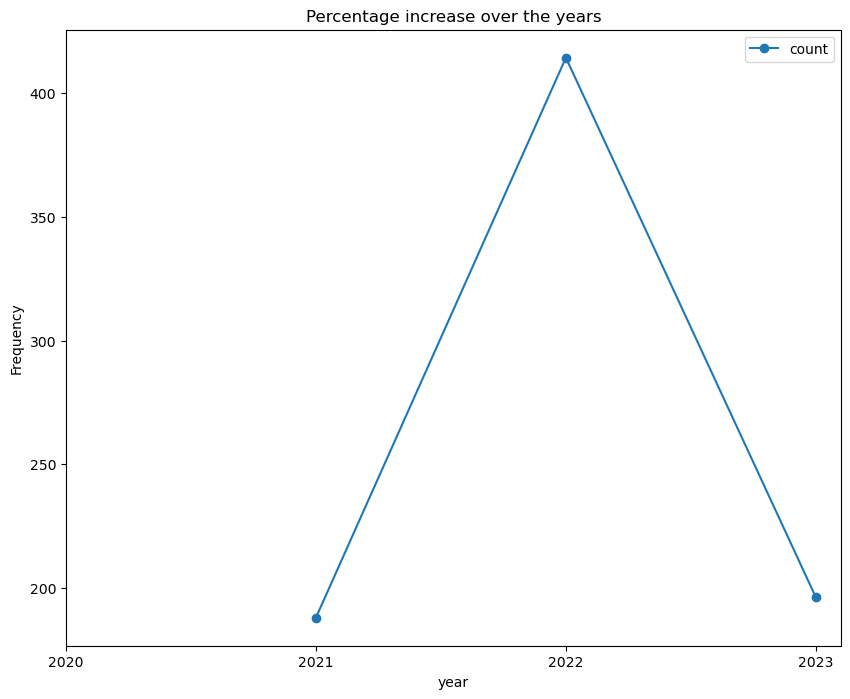

In [12]:
# Line plot of the percentage increase over the years
plt.figure(figsize= (10,8))
pct_ch.plot(marker='o')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.title('Percentage increase over the years')
plt.legend()
plt.xticks([2020, 2021, 2022,2023],['2020', '2021', '2022', '2023']);


In [13]:
min_year_sal =data.groupby('work_year')['salary_in_usd'].min()
max_year_sal = data.groupby('work_year')['salary_in_usd'].max()

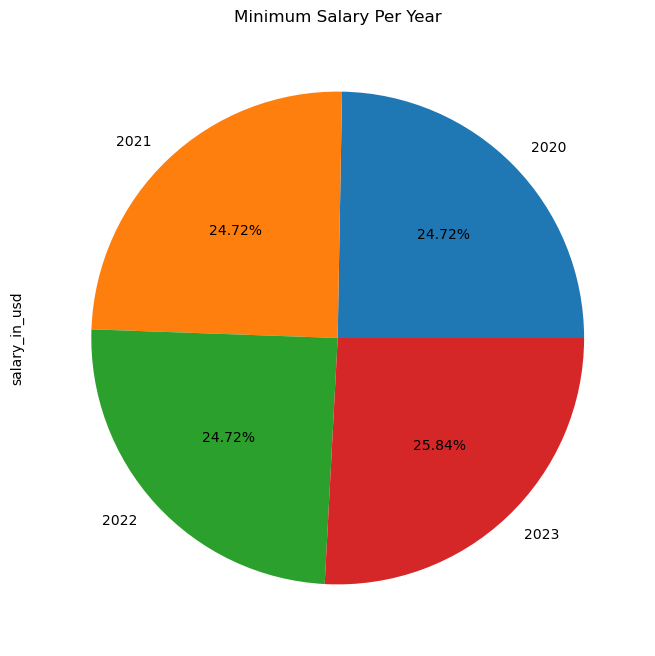

In [14]:
plt.figure(figsize= (10,8))
min_year_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Minimum Salary Per Year");

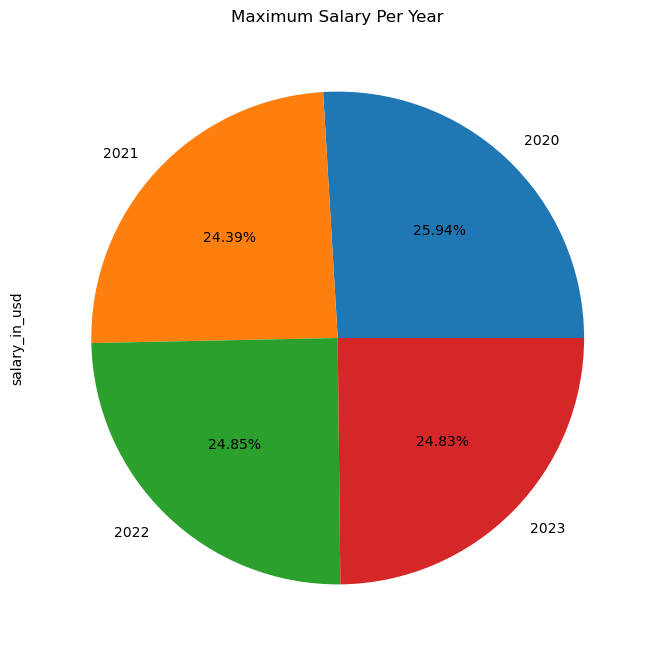

In [15]:
plt.figure(figsize= (10,8))
max_year_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Maximum Salary Per Year");

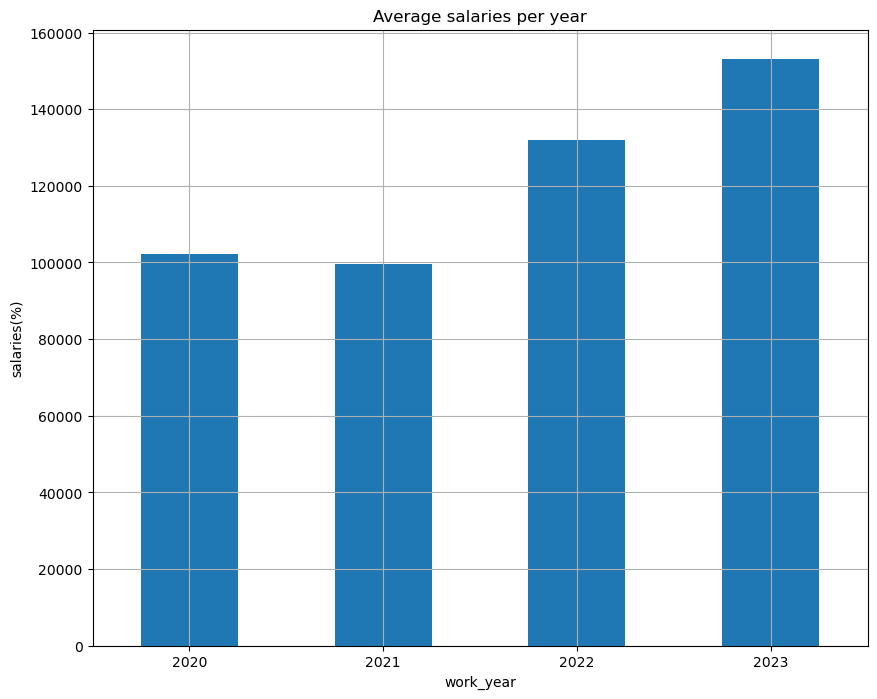

In [16]:
plt.figure(figsize= (10,8))
data.groupby('work_year')['salary_in_usd'].mean().plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per year')
plt.grid()
plt.xticks(rotation=0);

In `2023`, the average salary in the fields of business intelligence, data management, and data science was notably elevated compared to other years. This suggests that during that period, professionals in these domains enjoyed higher-than-average compensation levels, reflecting potentially favorable economic conditions or increased demand for their specialized skills and expertise.

In [17]:
data.groupby('work_year').aggregate({'salary_in_usd':['mean','median','std','min','max']})

salary_in_usd                                       
                    mean    median           std    min     max
work_year                                                      
2020       102250.866667   79833.0  82722.309481  15000  450000
2021        99501.287037   82636.0  67032.458991  15000  423000
2022       131873.915392  130000.0  61461.679738  15000  430967
2023       153107.239441  145900.0  67048.002855  15680  430640

In [18]:
grouped_data = data.groupby('work_year')['employment_type'].value_counts().unstack()
grouped_data

employment_type,CT,FL,FT,PT
work_year,,,,
2020,3,1,69,2
2021,3,3,206,4
2022,4,4,1097,6
2023,8,3,3279,1


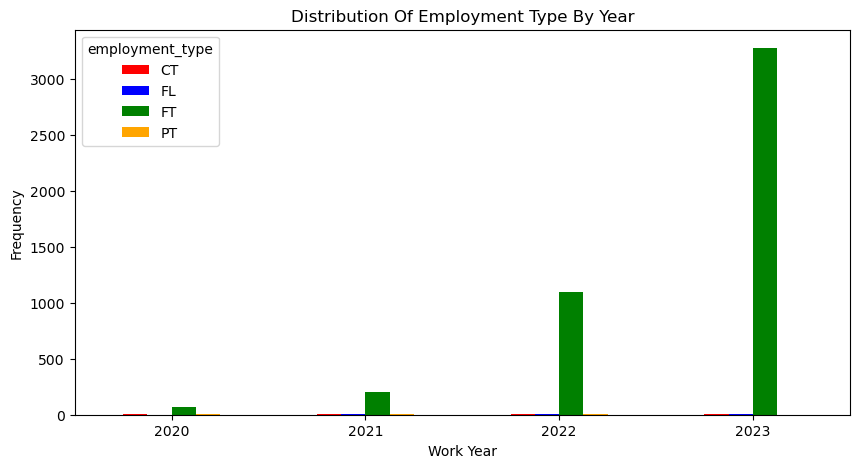

In [19]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('work_year')['employment_type'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)

ax.set_ylabel('Frequency')
ax.set_xlabel("Work Year")
ax.set_title('Distribution Of Employment Type By Year')
ax.set_xticks(range(len(grouped_data.index)))  # set positions for the ticks
ax.set_xticklabels(grouped_data.index, rotation=0)  # set labels from the index

plt.show()  

Full-time employment opportunities predominated in all subsequent years, indicating a prevalent preference among companies for offering full-time positions. This trend underscores the commitment of organizations to providing stable and comprehensive employment arrangements, reflecting their emphasis on long-term workforce engagement and investment.

In [20]:
# unstack the data to enable plot of stacked chart
grouped_data = data.groupby('work_year')['experience_level'].value_counts().unstack()
grouped_data

experience_level,EN,EX,MI,SE
work_year,,,,
2020,21,4,31,19
2021,46,10,85,75
2022,101,39,285,686
2023,184,142,705,2260


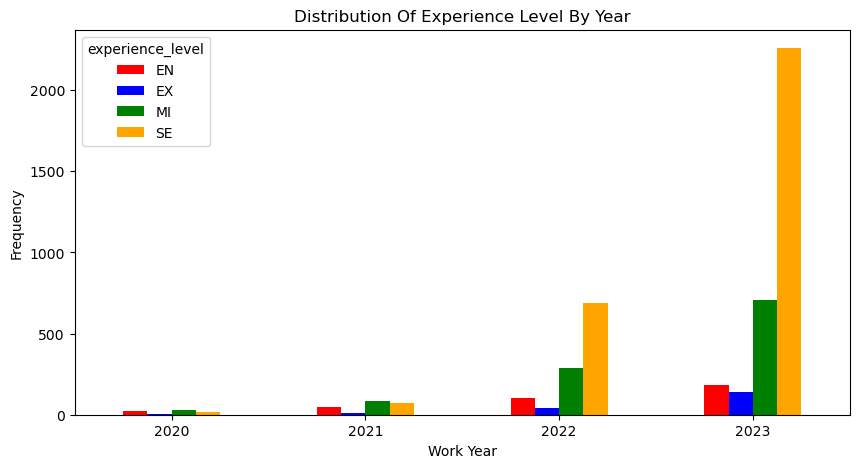

In [21]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('work_year')['experience_level'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Work Year")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Experience Level By Year')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

In `2022`, and `2023`, the Senior Entry experience level predominated, indicating that a significant proportion of individuals employed during these years held senior positions. Conversely, in `2020`, `2021`, the Mid-Entry experience level was prevalent, suggesting that the workforce composition during that period was characterized by a higher proportion of individuals at mid-level career stages.

In [22]:
# find the yearly percentage increase in each category
data.groupby('work_year')['experience_level'].value_counts().unstack().pct_change() * 100

experience_level,EN,EX,MI,SE
work_year,,,,
2020,NaN,NaN,NaN,NaN
2021,119.047619,150.000000,174.193548,294.736842
2022,119.565217,290.000000,235.294118,814.666667
2023,82.178218,264.102564,147.368421,229.446064


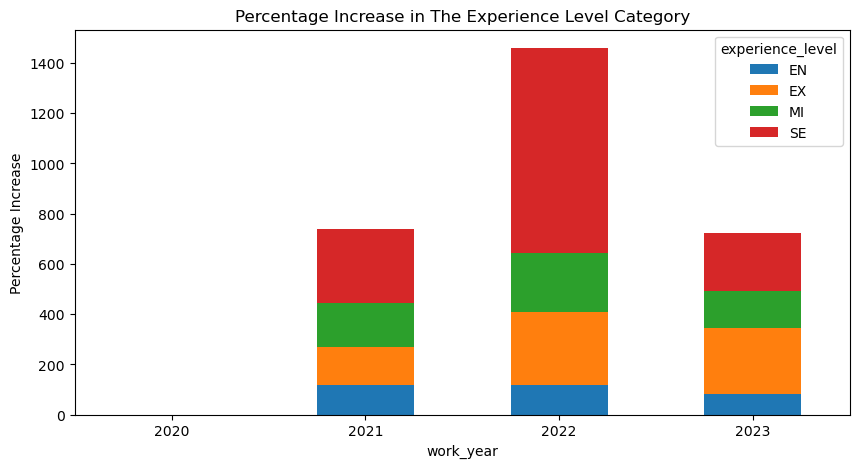

In [23]:
# Create a figure and axis with your desired figure size
fig, ax = plt.subplots(figsize=(10, 5))  # This ensures the figure is the desired size

# Calculate percentage change, multiply by 100 to convert to percentage, and plot
(data.groupby('work_year')['experience_level'].value_counts().unstack().pct_change()*100).plot(kind='bar', stacked=True, ax=ax)

# Setting labels and title
ax.set_ylabel('Percentage Increase')
ax.set_title('Percentage Increase in The Experience Level Category')

# Setting x-ticks rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show the plot
plt.show()

In [24]:
grouped_data = data.groupby('work_year')['company_size'].value_counts().unstack()
grouped_data

company_size,L,M,S
work_year,,,
2020,34,17,24
2021,122,52,42
2022,170,893,48
2023,181,3059,51


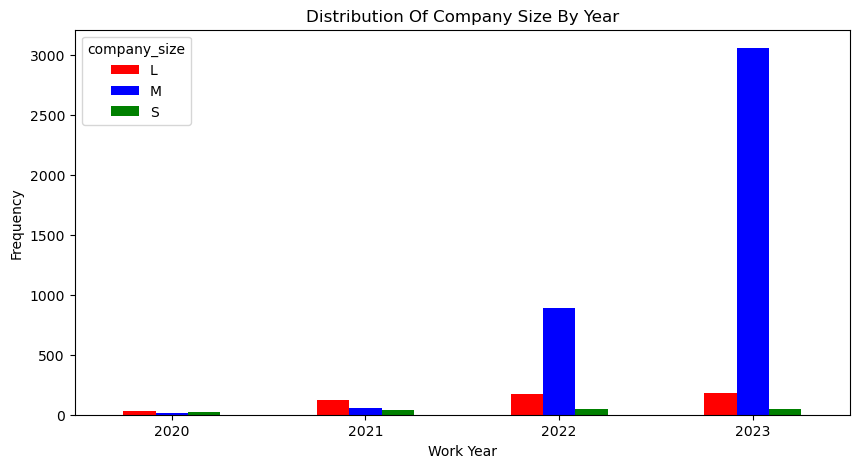

In [25]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green']

# Plot directly to the Axes object returned from subplots
data.groupby('work_year')['company_size'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Work Year")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Company Size By Year')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

In `2020` and `2021`, the majority of individuals were employed by large-sized companies, whereas in `2022` and `2023`, a significant portion of the workforce was engaged by middle-sized companies. This pattern suggests a dynamic employment landscape, with shifts in company size preferences over the years.

In [26]:
grouped_data = data.groupby('work_year')['remote_ratio'].value_counts().unstack()
grouped_data

remote_ratio,0,50,100
work_year,,,
2020,18,21,36
2021,29,72,115
2022,435,60,616
2023,1947,61,1283


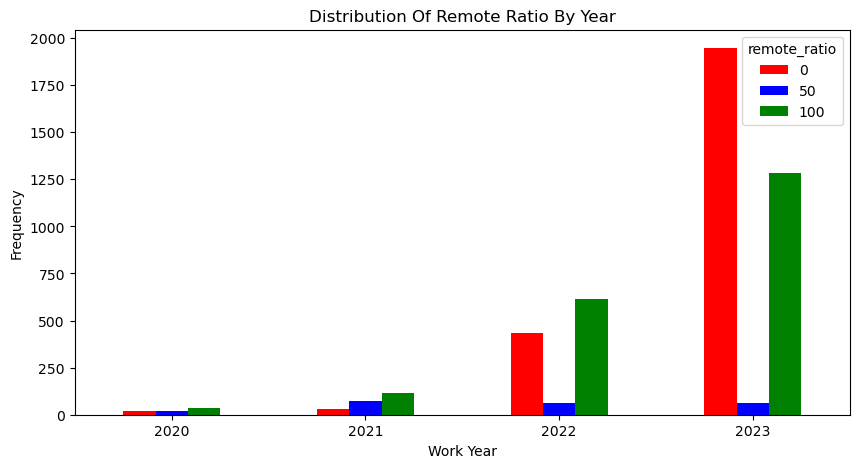

In [27]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green']

# Plot directly to the Axes object returned from subplots
data.groupby('work_year')['remote_ratio'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Work Year")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Remote Ratio By Year')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

In `2020`, `2021`, and `2022`, a considerable proportion of individuals worked remotely, indicating a prevalent remote work arrangement. However, in `2023`, there was a notable shift, with the majority of individuals returning to work in the company's offices, signaling a decrease in the remote work ratio during that year.

### Experience Level

In [28]:
# find the different years of the data
print(data['experience_level'].unique())

print("------------------------")

# find which year had the most workers
print(data['experience_level'].value_counts())



print("-----------------------")

# percentage wise
print(data['experience_level'].value_counts(normalize= True)*100)

['SE' 'MI' 'EN' 'EX']
------------------------
experience_level
SE    3040
MI    1106
EN     352
EX     195
Name: count, dtype: int64
-----------------------
experience_level
SE    64.777328
MI    23.567015
EN     7.500533
EX     4.155125
Name: proportion, dtype: float64


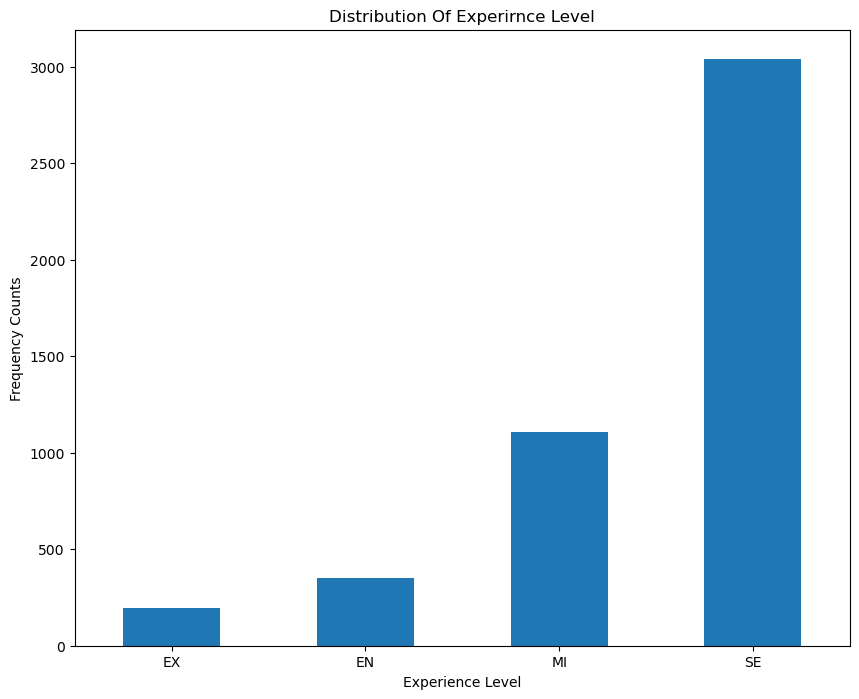

In [29]:
plt.figure(figsize= (10,8))
data['experience_level'].value_counts().sort_values().plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Frequency Counts')
plt.title('Distribution Of Experirnce Level')
plt.xticks(rotation=0);

In [30]:
min_cs_sal =data.groupby('experience_level')['salary_in_usd'].min()
max_cs_sal = data.groupby('experience_level')['salary_in_usd'].max()

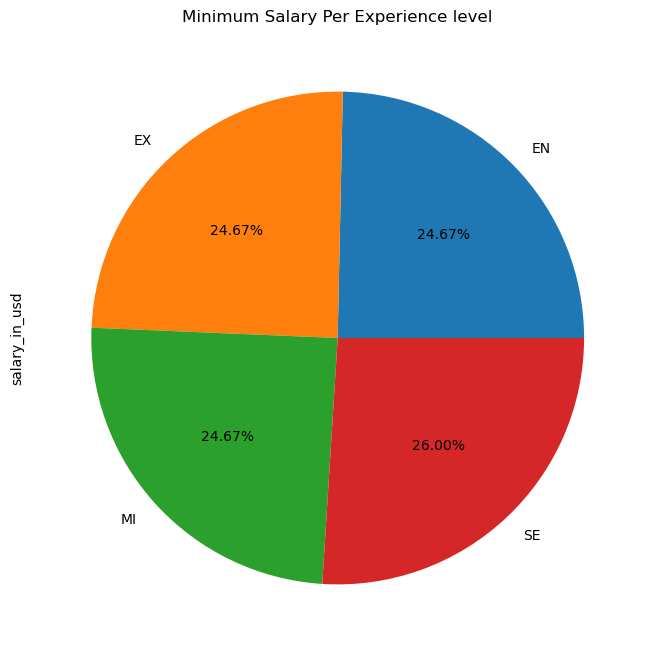

In [31]:
plt.figure(figsize= (10,8))
min_cs_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Minimum Salary Per Experience level");

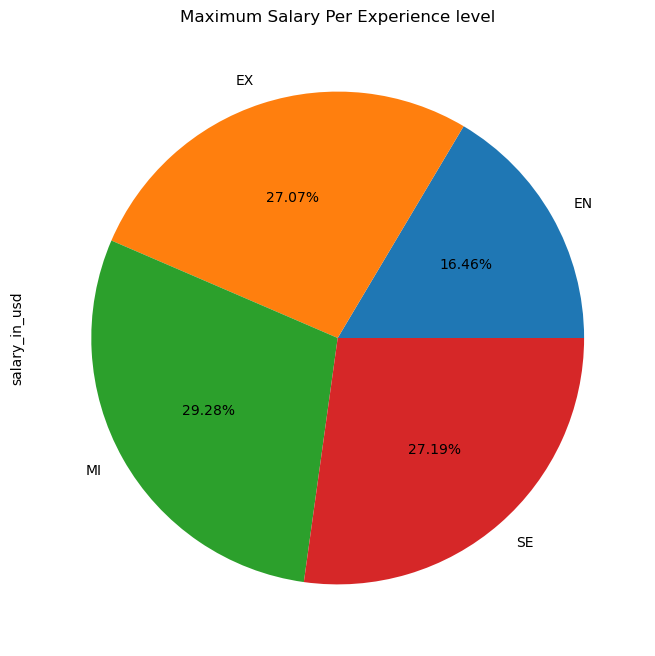

In [32]:
plt.figure(figsize= (10,8))
max_cs_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Maximum Salary Per Experience level");

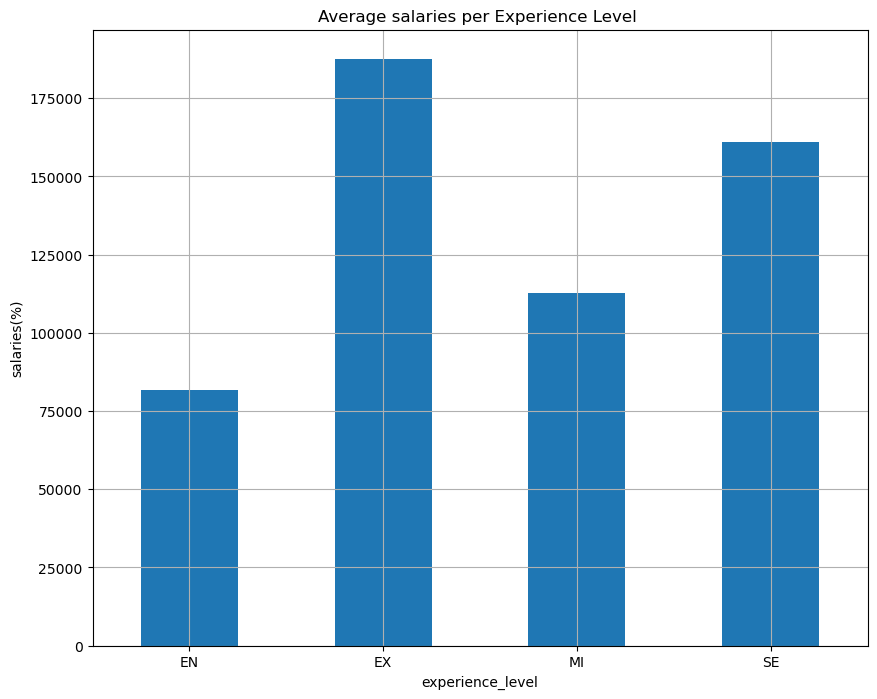

In [33]:
plt.figure(figsize= (10,8))
data.groupby('experience_level')['salary_in_usd'].mean().plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Experience Level ')
plt.grid()
plt.xticks(rotation=0);

On average, individuals at the executive level tend to earn higher salaries compared to those at other experience levels. This highlights the premium placed on executive roles in terms of compensation within the dataset.

In [34]:
data.groupby('experience_level').aggregate({'salary_in_usd':['mean','median','std','min','max']})

salary_in_usd                                       
                           mean    median           std    min     max
experience_level                                                      
EN                 81827.525568   72250.0  48652.149904  15000  252990
EX                187526.410256  180500.0  71973.627563  15000  416000
MI                112701.710669  104584.0  60580.869403  15000  450000
SE                161029.574671  154000.0  62481.248252  15809  417937

Among the experience levels, the Mid-Entry level commands the highest salary on average, while the Entry level typically earns the lowest salary. This suggests a distinct hierarchy in salary structures based on experience levels within the dataset.

In [35]:
grouped_data = data.groupby('experience_level')['employment_type'].value_counts().unstack()
grouped_data

employment_type,CT,FL,FT,PT
experience_level,,,,
EN,4.0,2.0,336.0,10.0
EX,1.0,NaN,194.0,NaN
MI,9.0,5.0,1089.0,3.0
SE,4.0,4.0,3032.0,NaN


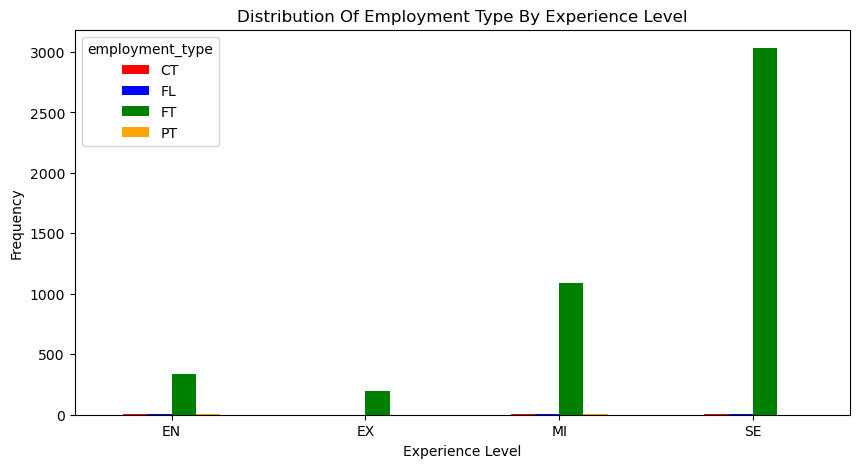

In [36]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('experience_level')['employment_type'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Experience Level")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Employment Type By Experience Level')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

The majority of individuals across these working experience levels are engaged in full-time employment. This indicates a prevalent preference for full-time work arrangements among individuals with varying levels of experience

In [37]:
grouped_data = data.groupby('experience_level')['company_size'].value_counts().unstack()
grouped_data

company_size,L,M,S
experience_level,,,
EN,102,203,47
EX,17,170,8
MI,160,886,60
SE,228,2762,50


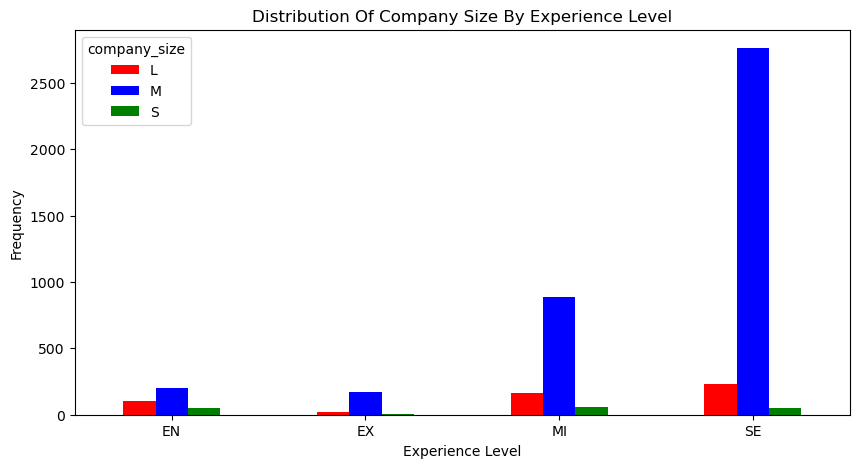

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green' ]

# Plot directly to the Axes object returned from subplots
data.groupby('experience_level')['company_size'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Experience Level")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Company Size By Experience Level')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

A significant portion of individuals across these working experience levels are employed by middle-sized companies. This suggests a notable concentration of workforce in mid-sized companies across different experience levels.

### Employment Type

In [39]:
# find the different years of the data
print(data['employment_type'].unique())

print("------------------------")

# find which year had the most workers
print(data['employment_type'].value_counts())



print("-----------------------")

# percentage wise
print(data['employment_type'].value_counts(normalize= True)*100)

['FT' 'CT' 'PT' 'FL']
------------------------
employment_type
FT    4651
CT      18
PT      13
FL      11
Name: count, dtype: int64
-----------------------
employment_type
FT    99.105050
CT     0.383550
PT     0.277008
FL     0.234392
Name: proportion, dtype: float64


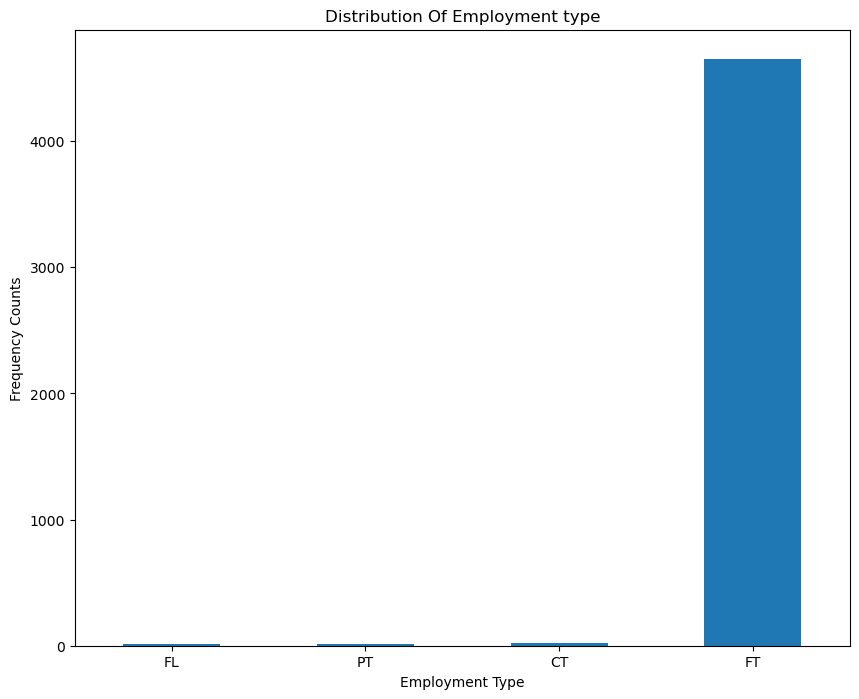

In [40]:
plt.figure(figsize= (10,8))
data['employment_type'].value_counts().sort_values().plot(kind='bar')
plt.xlabel('Employment Type')
plt.ylabel('Frequency Counts')
plt.title('Distribution Of Employment type')
plt.xticks(rotation=0);

In [41]:
min_em_sal =data.groupby('employment_type')['salary_in_usd'].min()
max_em_sal = data.groupby('employment_type')['salary_in_usd'].max()

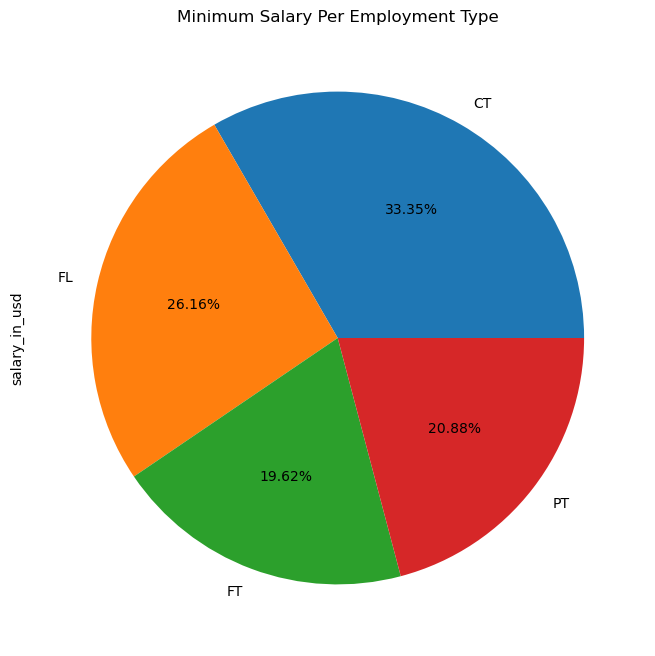

In [42]:
plt.figure(figsize= (10,8))
min_em_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Minimum Salary Per Employment Type");

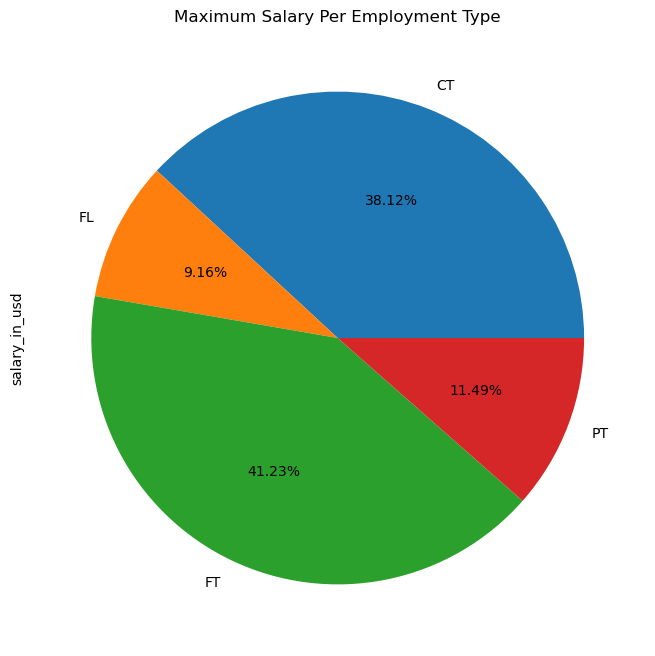

In [43]:
plt.figure(figsize= (10,8))
max_em_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Maximum Salary Per Employment Type");

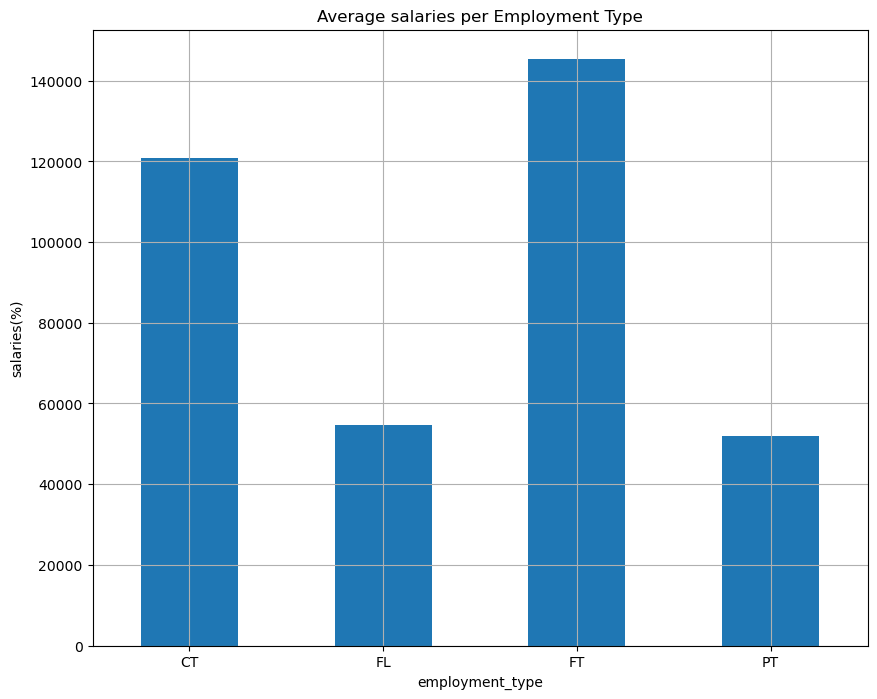

In [44]:
plt.figure(figsize= (10,8))
data.groupby('employment_type')['salary_in_usd'].mean().plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Employment Type')
plt.grid()
plt.xticks(rotation=0);

On average, remuneration for full-time positions surpasses that of alternative employment types, reflecting a propensity towards enhanced compensation packages for individuals engaged in full-time roles.

In [45]:
data.groupby('employment_type').aggregate({'salary_in_usd':['mean','median','std','min','max']})

salary_in_usd                                        
                          mean    median            std    min     max
employment_type                                                       
CT               120837.666667   93856.0  109549.051362  25500  416000
FL                54734.363636   50000.0   25394.005916  20000  100000
FT               145365.532359  140000.0   67212.539087  15000  450000
PT                52053.153846   34320.0   38091.986515  15966  125404

The full-time employment category exhibits a comparatively lower minimum salary range, while contract-based positions demonstrate a higher minimum salary threshold relative to other employment types. Conversely, full-time roles showcase a higher maximum salary range compared to alternative employment categories, whereas freelance engagements tend to feature a lower maximum salary range in comparison.

In [46]:
grouped_data = data.groupby('employment_type')['company_size'].value_counts().unstack()
grouped_data

company_size,L,M,S
employment_type,,,
CT,5,6,7
FL,1,5,5
FT,496,4007,148
PT,5,3,5


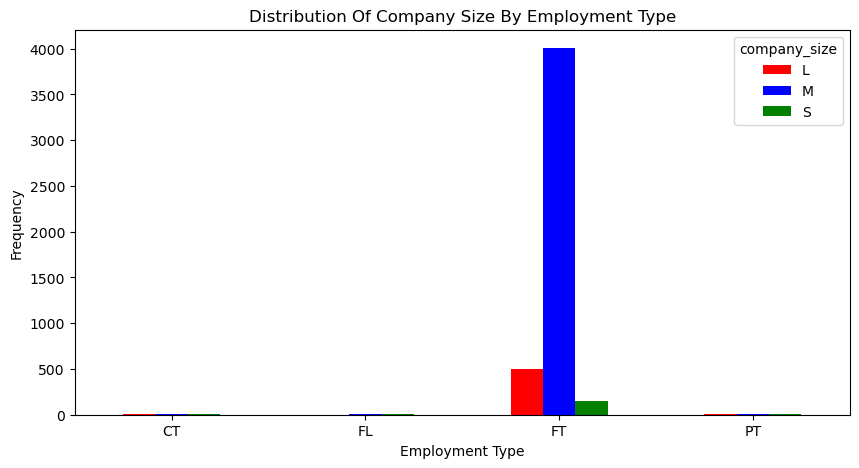

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green' ]

# Plot directly to the Axes object returned from subplots
data.groupby('employment_type')['company_size'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Employment Type")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Company Size By Employment Type')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

The bulk of contract-based positions are situated within small companies.

Freelance roles are primarily found in small and mid-sized companies.

Full-time employment is predominantly concentrated within mid-sized companies.

Part-time positions are commonly distributed among both small and large companies.


### Company Size

In [48]:
# find the different years of the data
print(data['company_size'].unique())

print("------------------------")

# find which year had the most workers
print(data['company_size'].value_counts())



print("-----------------------")

# percentage wise
print(data['company_size'].value_counts(normalize= True)*100)

['L' 'M' 'S']
------------------------
company_size
M    4021
L     507
S     165
Name: count, dtype: int64
-----------------------
company_size
M    85.680801
L    10.803324
S     3.515875
Name: proportion, dtype: float64


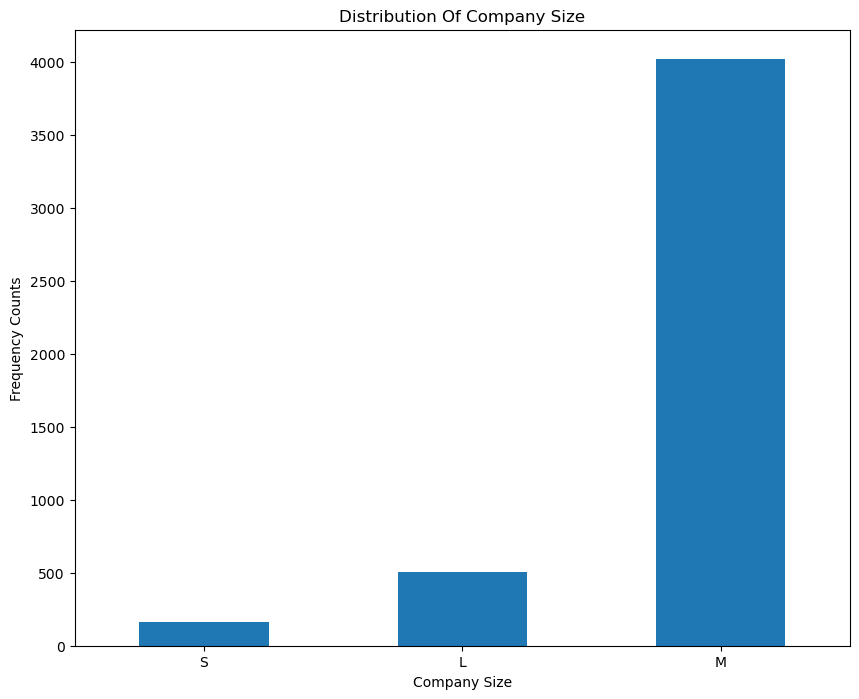

In [49]:
plt.figure(figsize= (10,8))
data['company_size'].value_counts().sort_values().plot(kind='bar')
plt.xlabel('Company Size')
plt.ylabel('Frequency Counts')
plt.title('Distribution Of Company Size')
plt.xticks(rotation=0);

In [50]:
min_cm_sal =data.groupby('company_size')['salary_in_usd'].min()
max_cm_sal = data.groupby('company_size')['salary_in_usd'].max()

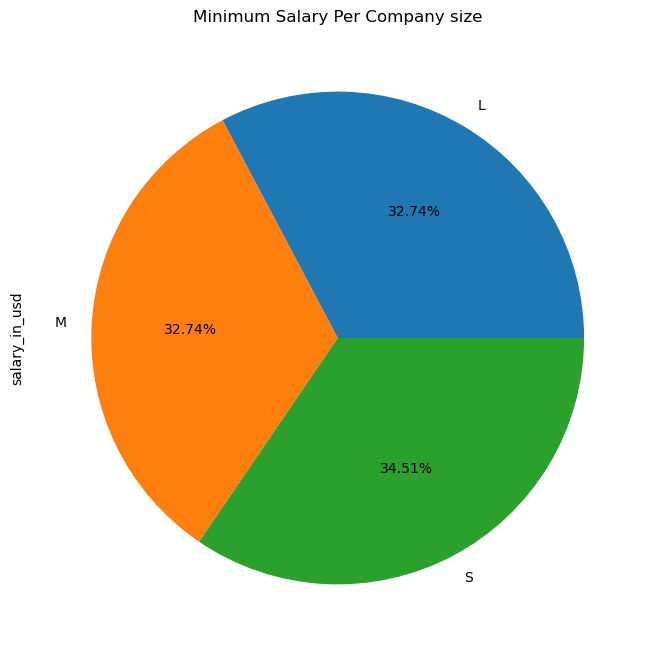

In [51]:
plt.figure(figsize= (10,8))
min_cm_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Minimum Salary Per Company size");

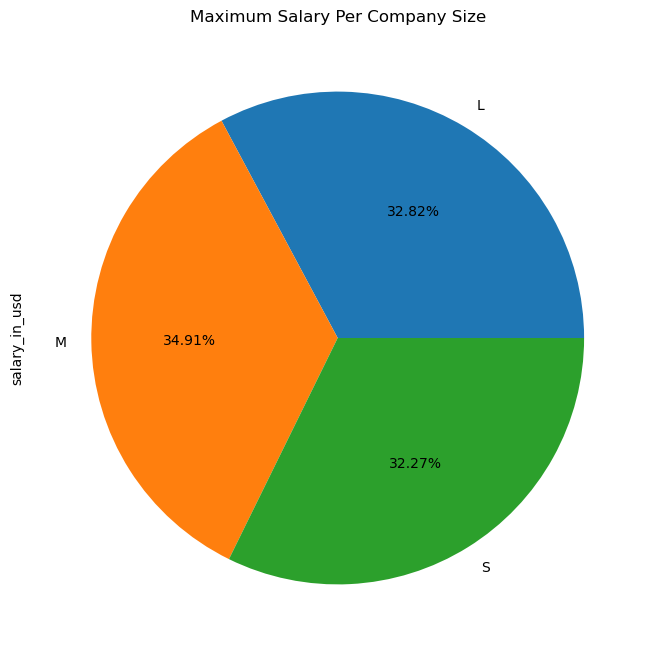

In [52]:
plt.figure(figsize= (10,8))
max_cm_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Maximum Salary Per Company Size");

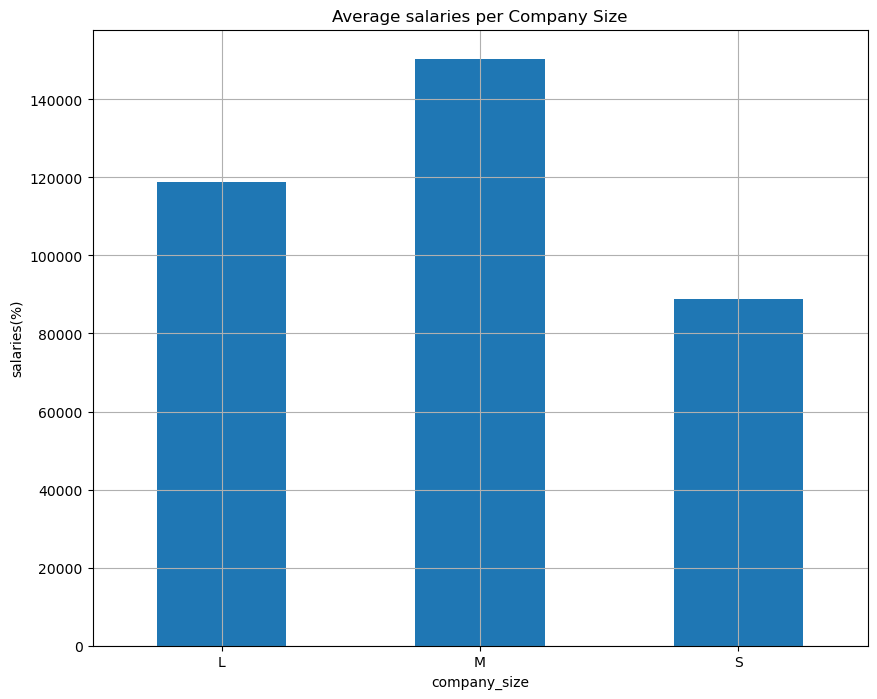

In [53]:
plt.figure(figsize= (10,8))
data.groupby('company_size')['salary_in_usd'].mean().plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Company Size')
plt.grid()
plt.xticks(rotation=0);

On average, mid-sized companies offer competitive compensation packages.

In [54]:
data.groupby('company_size').aggregate({'salary_in_usd':['mean','median','std','min','max']})

salary_in_usd                                       
                       mean    median           std    min     max
company_size                                                      
L             118710.315582  105000.0  76469.834671  15000  423000
M             150383.501368  144500.0  64871.551942  15000  450000
S              88913.630303   75648.0  59730.438193  15809  416000

### Remote Ratio

In [55]:
# find the different years of the data
print(data['remote_ratio'].unique())

print("------------------------")

# find which year had the most workers
print(data['remote_ratio'].value_counts())



print("-----------------------")

# percentage wise
print(data['remote_ratio'].value_counts(normalize= True)*100)

[  0 100  50]
------------------------
remote_ratio
0      2429
100    2050
50      214
Name: count, dtype: int64
-----------------------
remote_ratio
0      51.757937
100    43.682080
50      4.559983
Name: proportion, dtype: float64


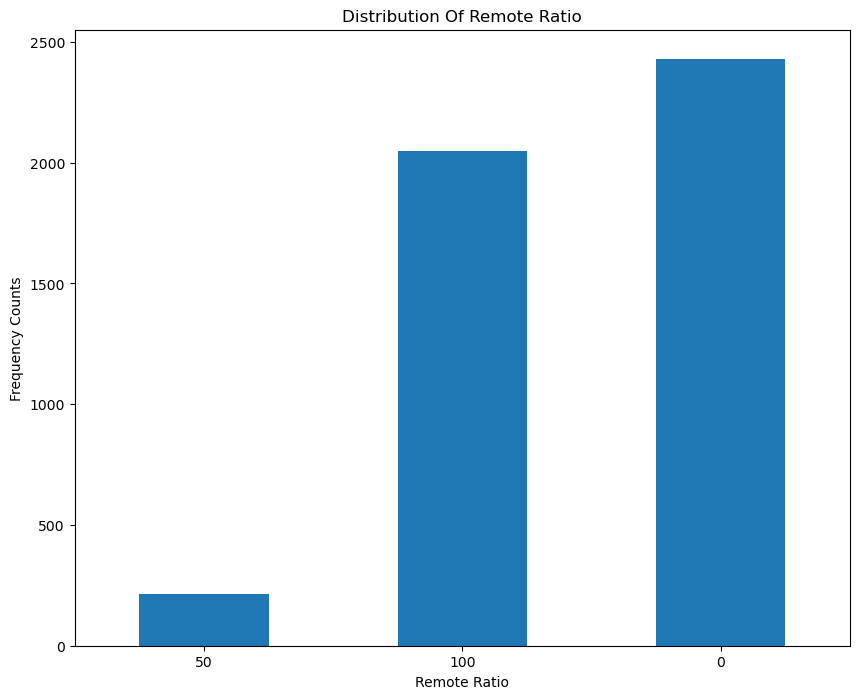

In [56]:
plt.figure(figsize= (10,8))
data['remote_ratio'].value_counts().sort_values().plot(kind='bar')
plt.xlabel('Remote Ratio')
plt.ylabel('Frequency Counts')
plt.title('Distribution Of Remote Ratio')
plt.xticks(rotation=0);

In [57]:
min_rr_sal =data.groupby('remote_ratio')['salary_in_usd'].min()
max_rr_sal = data.groupby('remote_ratio')['salary_in_usd'].max()

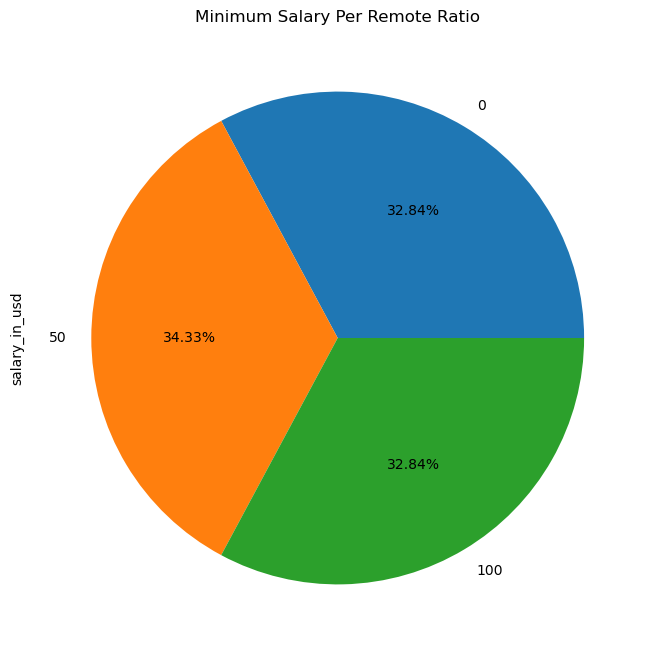

In [58]:
plt.figure(figsize= (10,8))
min_rr_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Minimum Salary Per Remote Ratio");

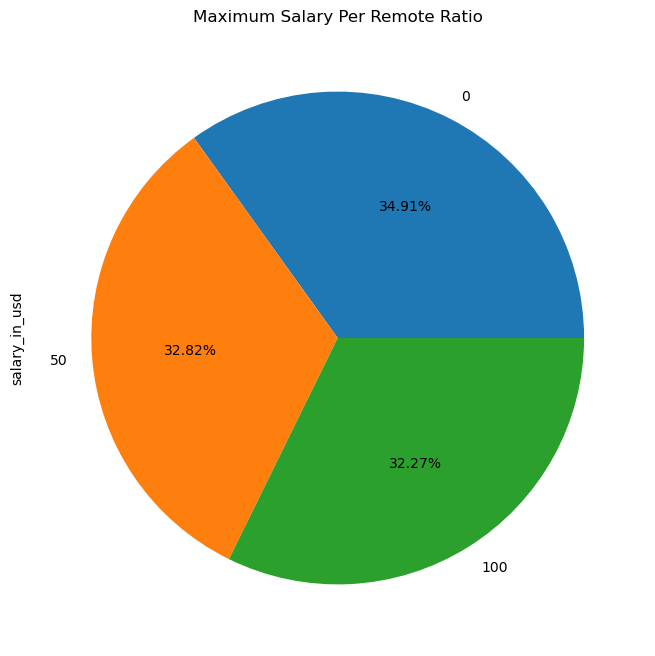

In [59]:
plt.figure(figsize= (10,8))
max_rr_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Maximum Salary Per Remote Ratio");

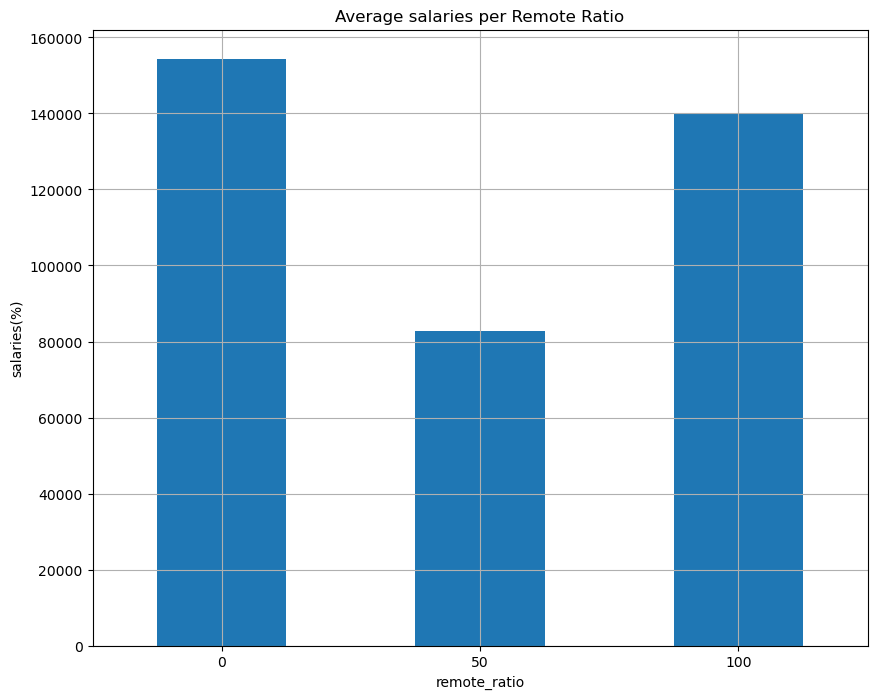

In [60]:
plt.figure(figsize= (10,8))
data.groupby('remote_ratio')['salary_in_usd'].mean().plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Remote Ratio')
plt.grid()
plt.xticks(rotation=0);

Individuals tend to earn higher average salaries when working at the company's offices, relative to their remote work ratio

In [61]:
data.groupby('remote_ratio').aggregate({'salary_in_usd':['mean','median','std','min','max']})

salary_in_usd                                       
                       mean    median           std    min     max
remote_ratio                                                      
0             154350.167559  145000.0  67245.363286  15000  450000
50             82675.303738   65844.0  61502.518798  15680  423000
100           139970.666341  136000.0  64661.216882  15000  416000

In [62]:
grouped_data = data.groupby('remote_ratio')['employment_type'].value_counts().unstack()
grouped_data

employment_type,CT,FL,FT,PT
remote_ratio,,,,
0,1.0,2.0,2426.0,NaN
50,2.0,3.0,203.0,6.0
100,15.0,6.0,2022.0,7.0


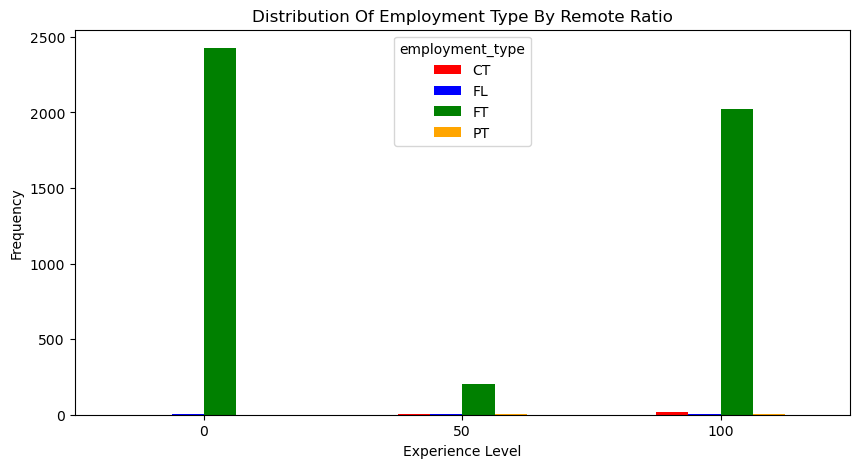

In [63]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('remote_ratio')['employment_type'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Experience Level")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Employment Type By Remote Ratio')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

The predominant work arrangement, whether it be fully remote, fully office-based, or a hybrid of both, is full-time employment for most individuals.

Also fully office-based companies do not offer Part time jobs. 

In [64]:
grouped_data = data.groupby('remote_ratio')['experience_level'].value_counts().unstack()
grouped_data

experience_level,EN,EX,MI,SE
remote_ratio,,,,
0,127,94,566,1642
50,68,8,84,54
100,157,93,456,1344


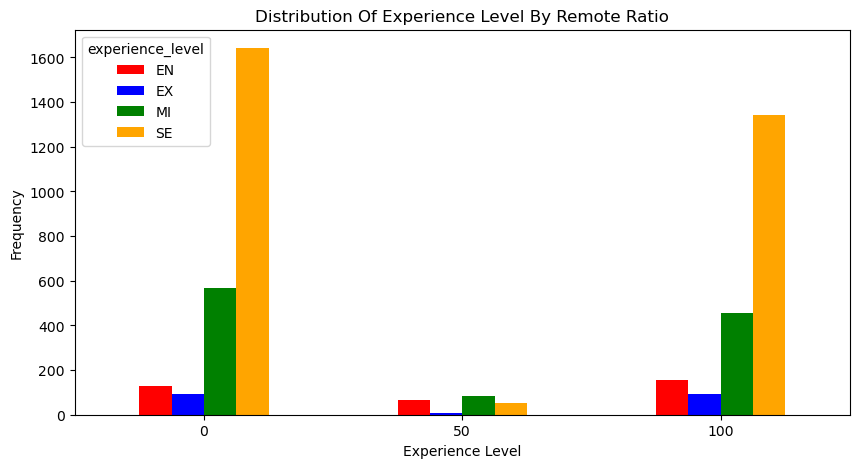

In [65]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('remote_ratio')['experience_level'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Experience Level")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Experience Level By Remote Ratio')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

The majority of individuals at the senior entry level engage in a combination of office-based and remote work arrangements.


In [66]:
grouped_data = data.groupby('remote_ratio')['company_size'].value_counts().unstack()
grouped_data

company_size,L,M,S
remote_ratio,,,
0,133,2267,29
50,127,51,36
100,247,1703,100


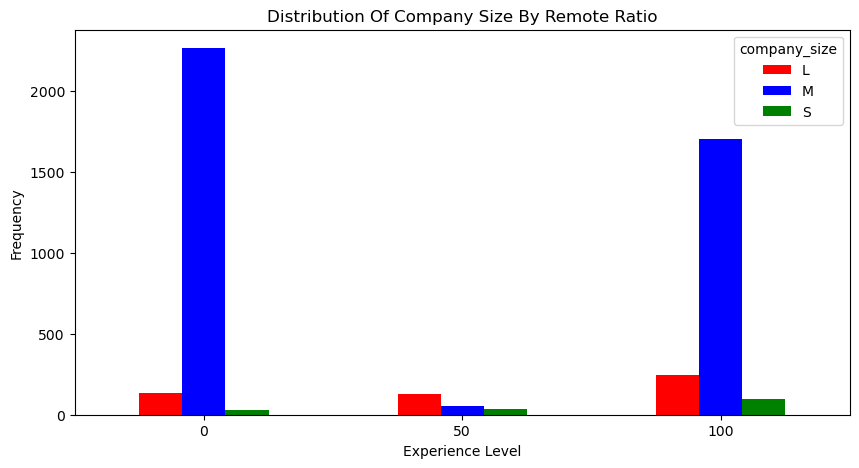

In [67]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('remote_ratio')['company_size'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Experience Level")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Company Size By Remote Ratio')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

A significant proportion of individuals who work either in the office, at home, or in a hybrid arrangement are employed by mid-sized companies.

### Company Location

In [68]:
#company location
print(f' We have {data.company_location.nunique()} company locations ')
data.company_location.unique()

 We have 73 company locations 


array(['US', 'GB', 'CA', 'GR', 'CO', 'PT', 'UA', 'FR', 'NL', 'IN', 'ES',
       'LV', 'MU', 'DE', 'PL', 'RU', 'IT', 'KR', 'EE', 'CZ', 'CH', 'BR',
       'QA', 'KE', 'DK', 'GH', 'SE', 'PH', 'AU', 'TR', 'AD', 'EC', 'MX',
       'IL', 'NG', 'SA', 'NO', 'AR', 'JP', 'ZA', 'HK', 'CF', 'FI', 'IE',
       'SG', 'SI', 'TH', 'HR', 'AM', 'BA', 'RO', 'PK', 'LT', 'IR', 'BS',
       'HU', 'AT', 'PR', 'AS', 'BE', 'ID', 'EG', 'AE', 'MY', 'HN', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'LU', 'MT'], dtype=object)

In [69]:
data['company_location'].value_counts().head(10)

company_location
US    3694
GB     323
CA     157
DE      71
ES      56
IN      50
FR      46
AU      21
PT      21
NL      18
Name: count, dtype: int64

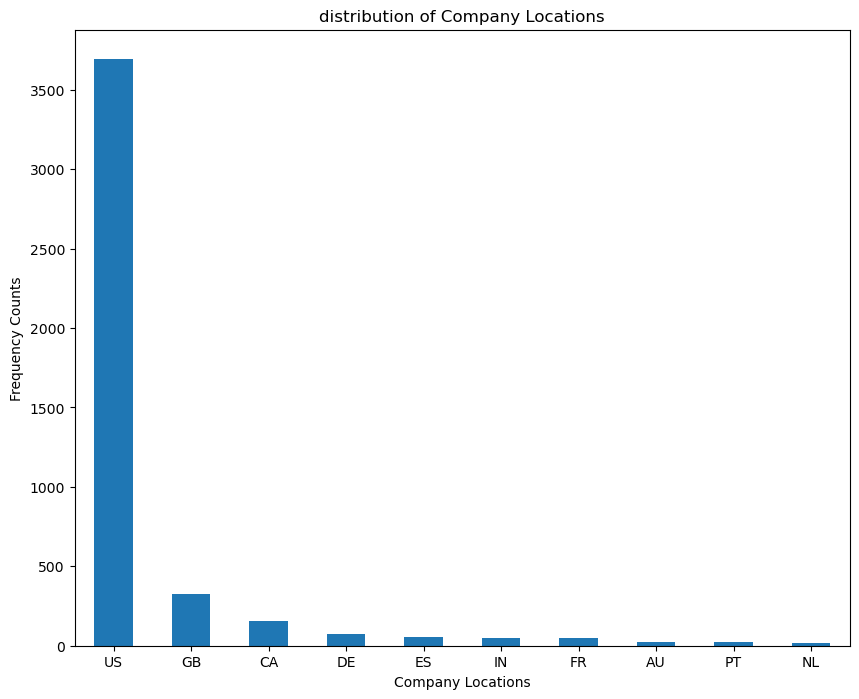

In [70]:
plt.figure(figsize= (10,8))
data['company_location'].value_counts().head(10).plot.bar()
plt.xlabel("Company Locations")
plt.ylabel('Frequency Counts')
plt.title('distribution of Company Locations')
plt.xticks(rotation=0);

Most of the individuals work in the US

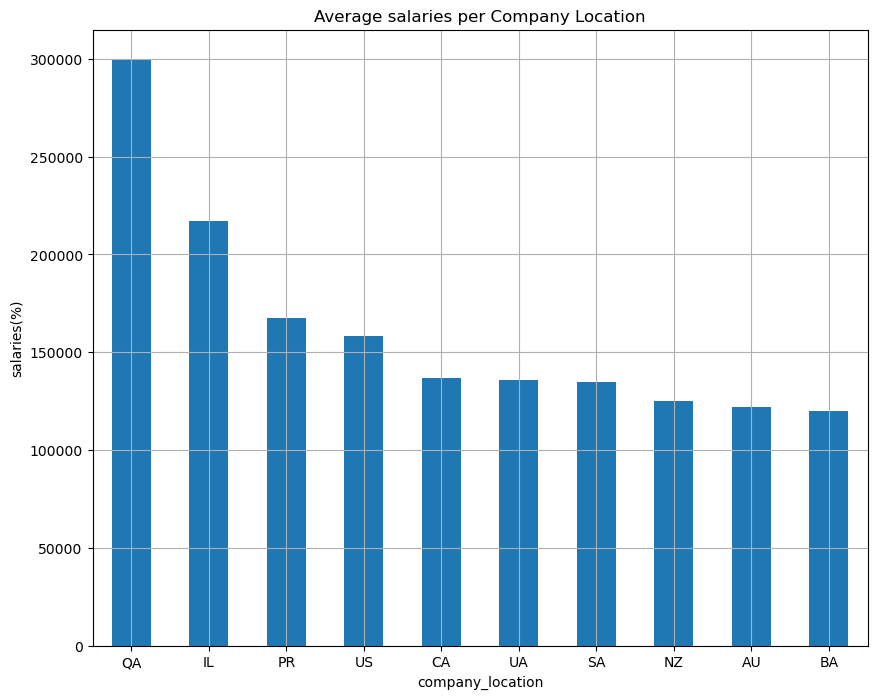

In [71]:
plt.figure(figsize= (10,8))
data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Company Location')
plt.grid()
plt.xticks(rotation=0);

In [72]:
import pycountry as p
p.countries.get(alpha_2 = 'QA')

Country(alpha_2='QA', alpha_3='QAT', flag='🇶🇦', name='Qatar', numeric='634', official_name='State of Qatar')

On average, companies in Qatar offer notably higher compensation compared to companies in other countries.

### Job title

In [73]:
#company location
print(f' We have {data.job_title.nunique()} jobs in the Dataset ')
data.job_title.unique()

 We have 118 jobs in the Dataset 


array(['Business Intelligence Engineer', 'Data Manager', 'Data Scientist',
       'Machine Learning Scientist', 'Analytics Engineer',
       'Data Architect', 'Machine Learning Engineer', 'Data Engineer',
       'Data Analyst', 'Research Scientist', 'Computer Vision Engineer',
       'Applied Scientist', 'Data Visualization Specialist',
       'ML Engineer', 'Research Engineer', 'Data Science Manager',
       'BI Analyst', 'Research Analyst', 'Insight Analyst',
       'Business Intelligence Analyst', 'AI Engineer',
       'Data Integration Specialist', 'Data Science Practitioner',
       'Data Science Engineer', 'Director of Data Science',
       'Data Specialist', 'Data Visualization Engineer', 'Data Modeler',
       'Head of Data', 'ETL Developer', 'BI Developer',
       'Data Analytics Manager', 'Azure Data Engineer',
       'Decision Scientist', 'Machine Learning Infrastructure Engineer',
       'Data Lead', 'Data Developer', 'AI Developer',
       'Principal Data Scientist', 'Data

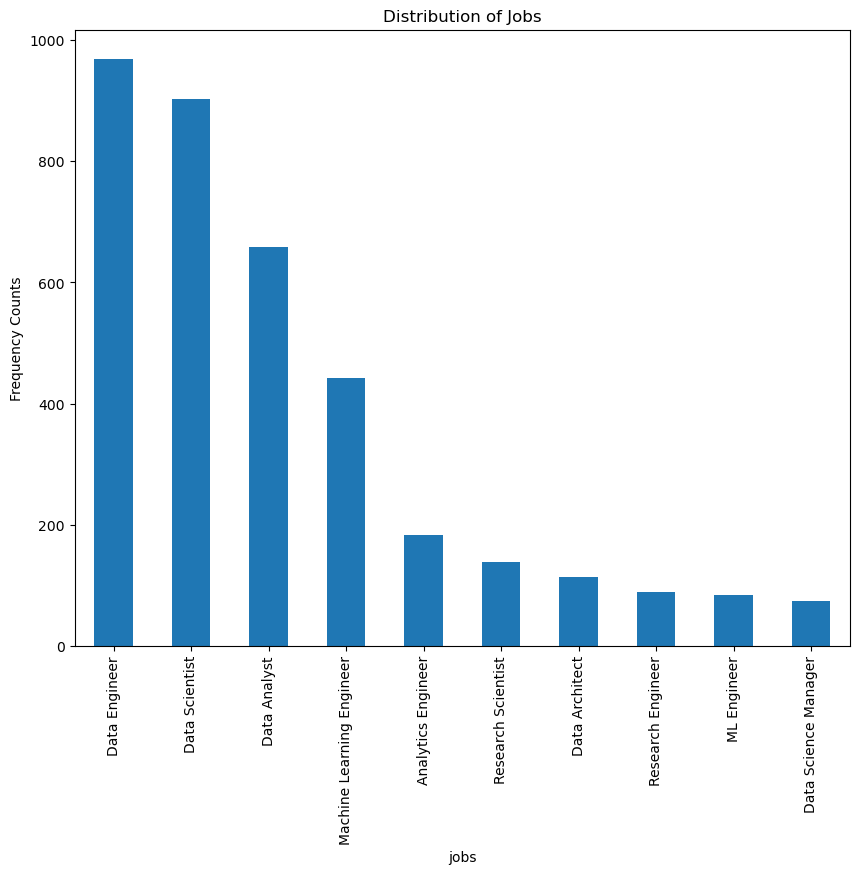

In [74]:
plt.figure(figsize= (10,8))
data['job_title'].value_counts().head(10).plot.bar()
plt.xlabel("jobs")
plt.ylabel('Frequency Counts')
plt.title('Distribution of Jobs')
plt.xticks(rotation=90);

Data Engineer is the most prevalent job title in the dataset.


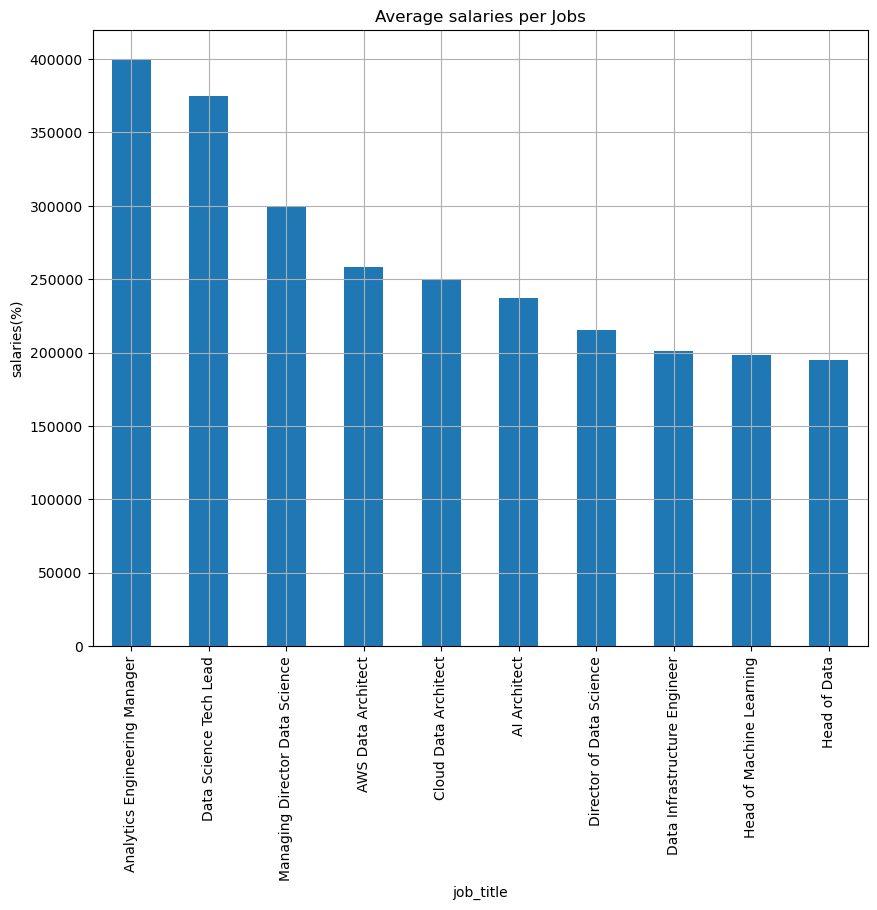

In [75]:
plt.figure(figsize= (10,8))
data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Jobs')
plt.grid()
plt.xticks(rotation=90);

Analyst Engineering Manager positions tend to have higher average salaries compared to other roles within the dataset.

### Salary

In [76]:
# find minimum salary
print('The minimum Salary:', data['salary_in_usd'].min())
print('The maximum Salary:', data['salary_in_usd'].max())
print('The mean Salary:', data['salary_in_usd'].mean())
print("The median salary is:", data['salary_in_usd'].mean())

The minimum Salary: 15000
The maximum Salary: 450000
The mean Salary: 144800.54080545492
The median salary is: 144800.54080545492


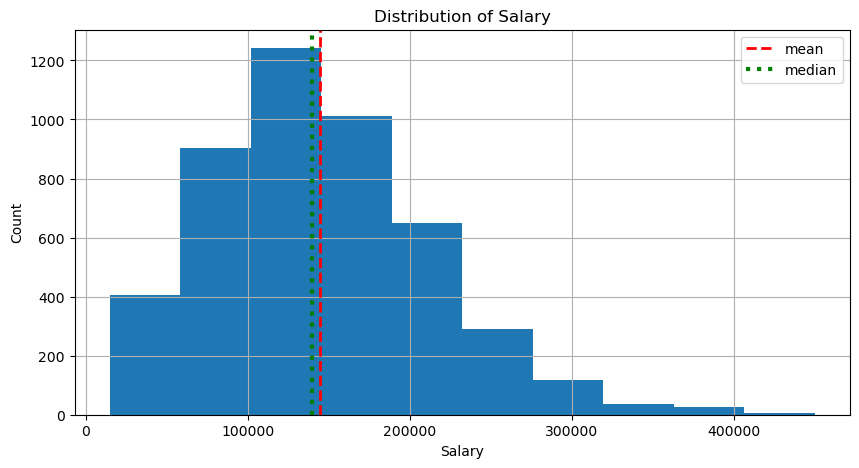

In [77]:
# visualize the salary for better interpretion
mean = data['salary_in_usd'].mean()
median = data['salary_in_usd'].median()


plt.figure(figsize= (10,5))
data['salary_in_usd'].hist()
plt.axvline(mean, linestyle='--', linewidth= 2, color= 'r', label = 'mean')
plt.axvline(median, linestyle=':', linewidth= 3, color= 'g', label = "median")
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Salary')
plt.legend();

##### We can notice some skewness in our chart. This skewness means that there is some outliers in our `salary` variable

# Data Preprocessing

In [78]:
data["job_title"].value_counts().head(40)

job_title
Data Engineer                               969
Data Scientist                              903
Data Analyst                                659
Machine Learning Engineer                   443
Analytics Engineer                          183
Research Scientist                          138
Data Architect                              113
Research Engineer                            88
ML Engineer                                  84
Data Science Manager                         74
Applied Scientist                            72
Machine Learning Scientist                   57
Data Manager                                 49
Business Intelligence Engineer               38
Data Science Consultant                      33
Business Intelligence Analyst                30
Data Specialist                              28
Data Analytics Manager                       27
BI Developer                                 26
Director of Data Science                     25
Head of Data                  

In [79]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    return categorical_map        

In [80]:
job_map = shorten_categories(data['job_title'].value_counts(), 20)
data['job_title'] = data['job_title'].map(job_map)
data['job_title'].value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_13920\1204480612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['job_title'] = data['job_title'].map(job_map)


job_title
Data Engineer                               969
Data Scientist                              903
Data Analyst                                659
Other                                       514
Machine Learning Engineer                   443
Analytics Engineer                          183
Research Scientist                          138
Data Architect                              113
Research Engineer                            88
ML Engineer                                  84
Data Science Manager                         74
Applied Scientist                            72
Machine Learning Scientist                   57
Data Manager                                 49
Business Intelligence Engineer               38
Data Science Consultant                      33
Business Intelligence Analyst                30
Data Specialist                              28
Data Analytics Manager                       27
BI Developer                                 26
Director of Data Science      

In [81]:
country_map = shorten_categories(data['company_location'].value_counts(), 18)
data['company_location'] = data['company_location'].map(country_map)
data['company_location'].value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_13920\3096728124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['company_location'] = data['company_location'].map(country_map)


company_location
US       3694
GB        323
Other     236
CA        157
DE         71
ES         56
IN         50
FR         46
PT         21
AU         21
NL         18
Name: count, dtype: int64

<div style= "background-color: #fbceb1; padding: 10px;">
    <strong>Note!!!</strong>
    <br>
    Only job titles with value counts exceeding 20 were considered for model building to mitigate the risk of overfitting, as job titles with lower counts may introduce unnecessary complexity and potentially compromise the model's performance. 
     </div>

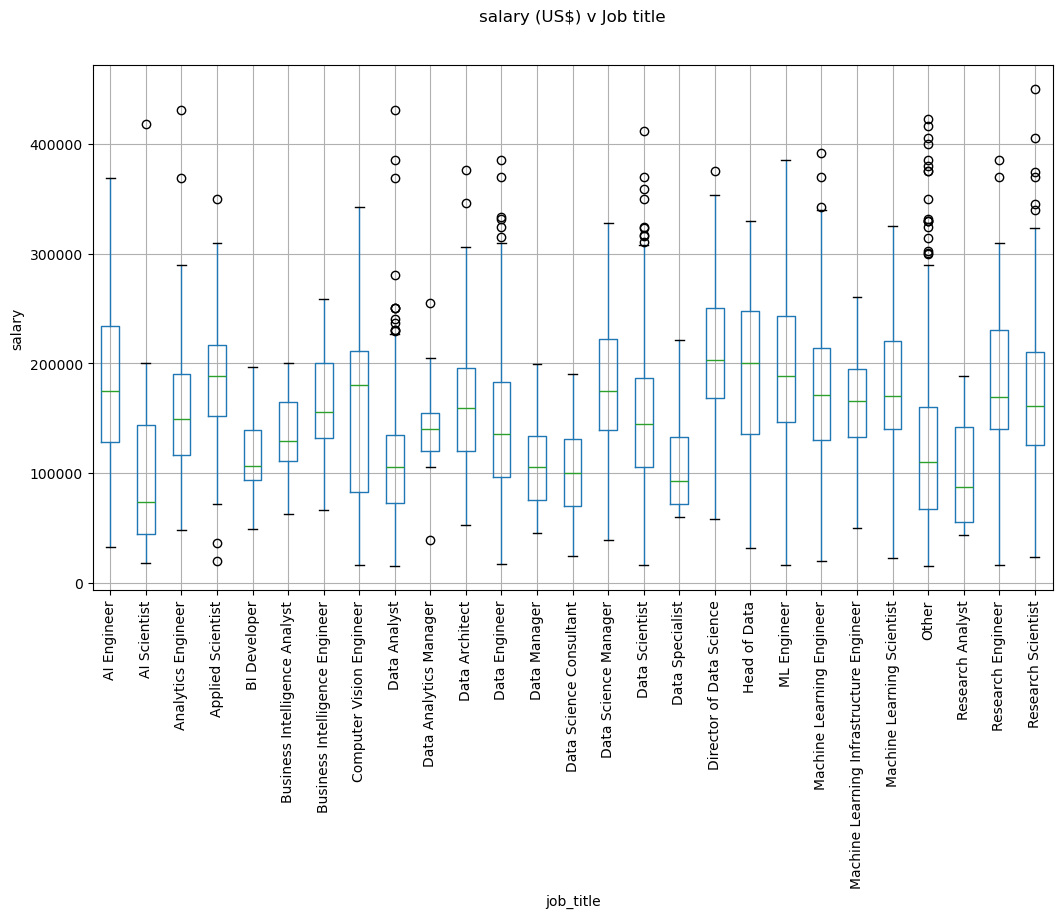

In [82]:
fig, ax = plt.subplots(1,1, figsize= (12, 7))
data.boxplot("salary_in_usd", "job_title", ax = ax)
plt.suptitle("salary (US$) v Job title")
plt.title('')
plt.ylabel("salary")
plt.xticks(rotation =90)
plt.show()

<div style= "background-color: #fbceb1; padding: 10px;">
    <strong>Note!!!</strong>
    <br>
    Let's build our model using data where the salary falls within the range of 10,000 and 360,000, excluding outliers beyond this range.
    </div>

In [83]:
data=data[data['salary_in_usd'] <= 360000]
data=data[data['salary_in_usd'] >= 10000 ]
data=data[data['job_title'] != 'Other']
data=data[data['company_location'] != 'Other']

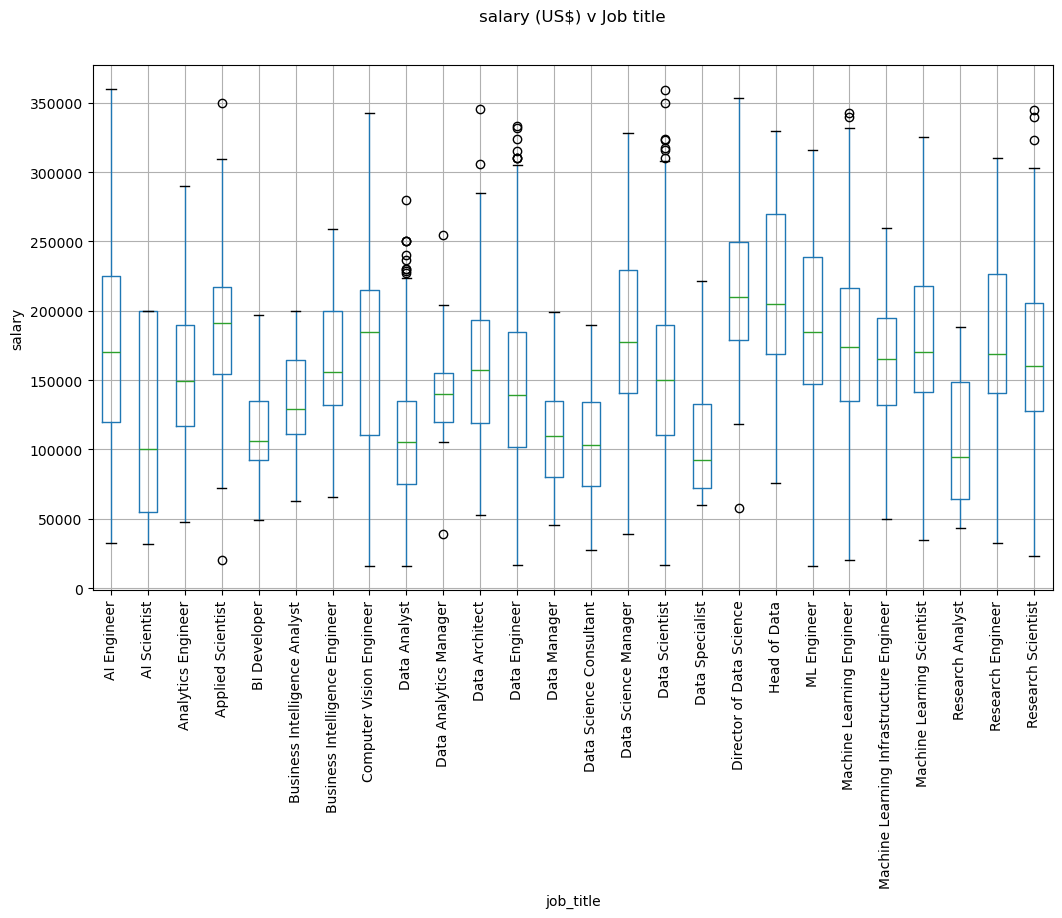

In [84]:
fig, ax = plt.subplots(1,1, figsize= (12, 7))
data.boxplot("salary_in_usd", "job_title", ax = ax)
plt.suptitle("salary (US$) v Job title")
plt.title('')
plt.ylabel("salary")
plt.xticks(rotation =90)
plt.show()

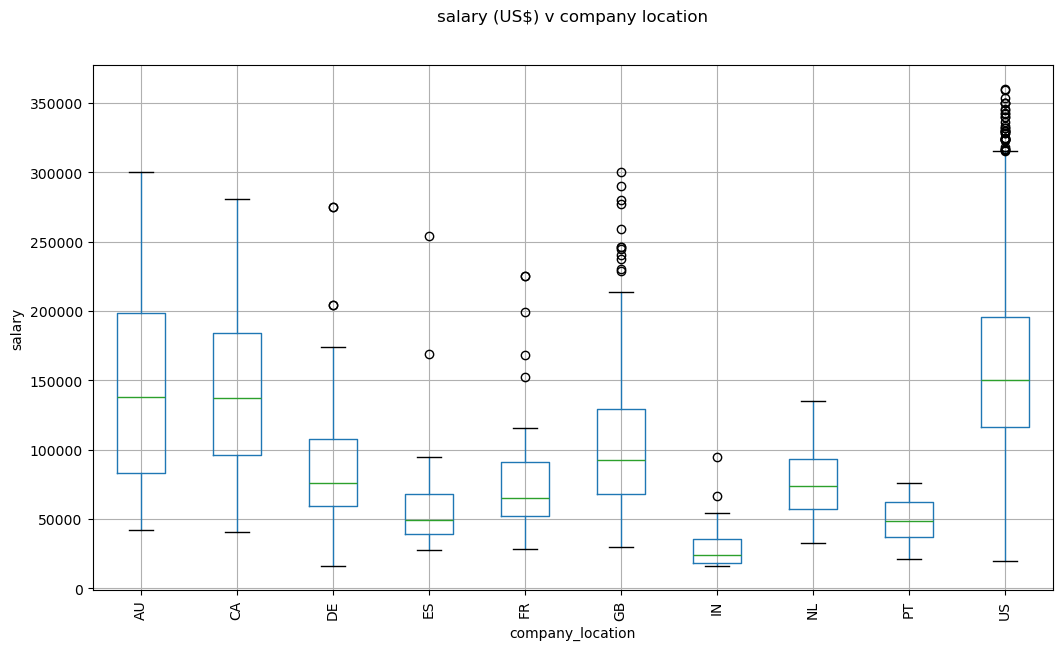

In [85]:
fig, ax = plt.subplots(1,1, figsize= (12, 7))
data.boxplot("salary_in_usd", "company_location", ax = ax)
plt.suptitle("salary (US$) v company location")
plt.title('')
plt.ylabel("salary")
plt.xticks(rotation =90)
plt.show()

In [86]:
from sklearn.preprocessing import LabelEncoder
le_expl=LabelEncoder()
data["experience_level"] = le_expl.fit_transform(data["experience_level"])
data["experience_level"].unique()

array([3, 2, 0, 1])

In [87]:
le_empt=LabelEncoder()
data["employment_type"] = le_empt.fit_transform(data["employment_type"])
data["employment_type"].unique()

array([2, 0, 3, 1])

In [88]:
le_compz=LabelEncoder()
data["company_size"] = le_compz.fit_transform(data["company_size"])
data["company_size"].unique()

array([0, 1, 2])

In [89]:
le_jobtitle=LabelEncoder()
data["job_title"] = le_jobtitle.fit_transform(data["job_title"])
data["job_title"].unique()

array([ 6, 12, 15, 22,  2, 10, 20, 11,  8, 25,  7,  3, 19, 24, 14, 23,  5,
        0, 17, 16, 18,  4,  9, 21, 13,  1])

In [90]:
le_compl=LabelEncoder()
data["company_location"] = le_compl.fit_transform(data["company_location"])
data["company_location"].unique()

array([9, 5, 1, 4, 8, 7, 6, 3, 2, 0])

In [91]:
cols = ['salary','salary_currency','employee_residence']
data.drop(cols,axis = 1,inplace = True)
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,3,2,6,202800,0,9,0
1,2023,3,2,6,104300,0,9,0
2,2023,2,2,12,73824,0,5,1
3,2023,2,2,12,67672,0,5,1
4,2023,3,2,15,290000,0,9,1


In [92]:
correlation = data.corr()
correlation

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
work_year,1.000000,0.171057,-0.001610,0.013013,0.218959,-0.176305,0.137914,0.212176
experience_level,0.171057,1.000000,-0.036116,0.010568,0.294957,-0.019573,0.140811,0.059317
employment_type,-0.001610,-0.036116,1.000000,-0.030931,-0.003628,-0.021314,-0.038754,-0.062759
job_title,0.013013,0.010568,-0.030931,1.000000,0.205488,-0.078389,-0.022675,0.009245
salary_in_usd,0.218959,0.294957,-0.003628,0.205488,1.000000,-0.075754,0.261313,0.035657
remote_ratio,-0.176305,-0.019573,-0.021314,-0.078389,-0.075754,1.000000,-0.058252,-0.013698
company_location,0.137914,0.140811,-0.038754,-0.022675,0.261313,-0.058252,1.000000,0.062274
company_size,0.212176,0.059317,-0.062759,0.009245,0.035657,-0.013698,0.062274,1.000000


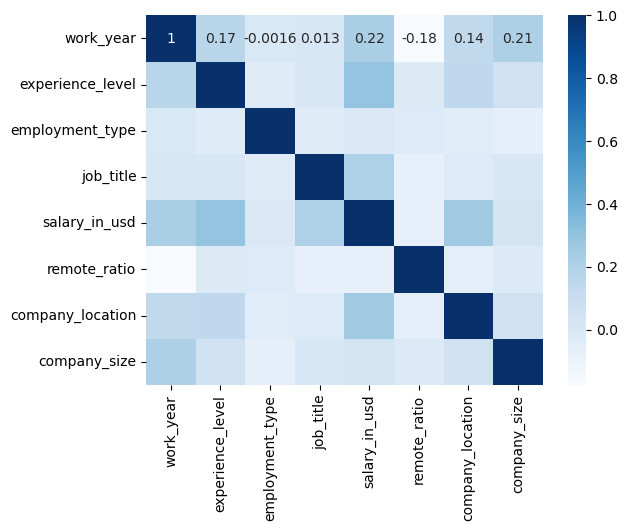

In [93]:
sns.heatmap(correlation, cmap = 'Blues',annot = True);

## Split

In [94]:
# split dataset into dependent and independent variables
X= data.drop('salary_in_usd', axis = 1)     #independent variable
y= data['salary_in_usd']   # dependent variable
print('shape of X(independent variables):{}'.format(X.shape))
print('shape of y(dependent variable):{}'.format(y.shape))

shape of X(independent variables):(3986, 7)
shape of y(dependent variable):(3986,)


In [95]:
X.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [96]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3587, 7)
y_train shape: (3587,)
X_test shape: (399, 7)
y_test shape: (399,)


# Model building

In [97]:
max_depth = [None,2,4,6,8,10,12]
parameters= {"max_depth":max_depth}
regressor=DecisionTreeRegressor(random_state=42)
gs=GridSearchCV(regressor, parameters, scoring="neg_mean_squared_error")
gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [98]:
best_params= gs.best_params_
best_params

{'max_depth': 8}

In [99]:
# creating a new model with best params
model_r = DecisionTreeRegressor(random_state = 42, **best_params)
model_r.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

## Evaluation of Model

In [100]:
y_pred= model_r.predict(X_train)

In [101]:
y_predt = model_r.predict(X_test)

In [102]:
mae =  mean_absolute_error(y_train,y_pred)
print(f"The mean absolute error for the training data is: {round(mae,2)}")

The mean absolute error for the training data is: 36341.88


In [103]:
mae = mean_absolute_error(y_test,y_predt)
print(f"The mean absolute error of the Testing dataset is :  {round(mae,2)}")

The mean absolute error of the Testing dataset is :  38103.42


In [104]:
p = np.array([[2020, "MI", "FT", "Data Manager", 100, "US", "L"]])
p

array([['2020', 'MI', 'FT', 'Data Manager', '100', 'US', 'L']],
      dtype='<U12')

In [105]:
p[:, 1]=le_expl.transform(p[:, 1])
p[:, 2]=le_empt.transform(p[:, 2])
p[:, 3]=le_jobtitle.transform(p[:, 3])
p[:, 5]=le_compl.transform(p[:, 5])
p[:, 6]=le_compz.transform(p[:, 6])
p=p.astype(float)
p


array([[2.02e+03, 2.00e+00, 2.00e+00, 1.20e+01, 1.00e+02, 9.00e+00,
        0.00e+00]])

In [106]:
y_predictor=model_r.predict(p)
y_predictor

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([134064.26470588])

## Communication of Result

In [107]:
index_list = X_train.columns.tolist()
index_list

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'remote_ratio',
 'company_location',
 'company_size']

In [108]:
# Feature importance
feat_imp = model_r.feature_importances_.tolist()
feat_imp

[0.048491291957018866,
 0.24488583375605538,
 0.001802932196056739,
 0.3367727863236392,
 0.030344715240658945,
 0.3194079654666906,
 0.018294475059880192]

In [109]:
# feature importance dataframe
df_feat_imp = pd.DataFrame({'feature importance': feat_imp}, index=index_list)
df_feat_imp

,feature importance
work_year,0.048491
experience_level,0.244886
employment_type,0.001803
job_title,0.336773
remote_ratio,0.030345
company_location,0.319408
company_size,0.018294


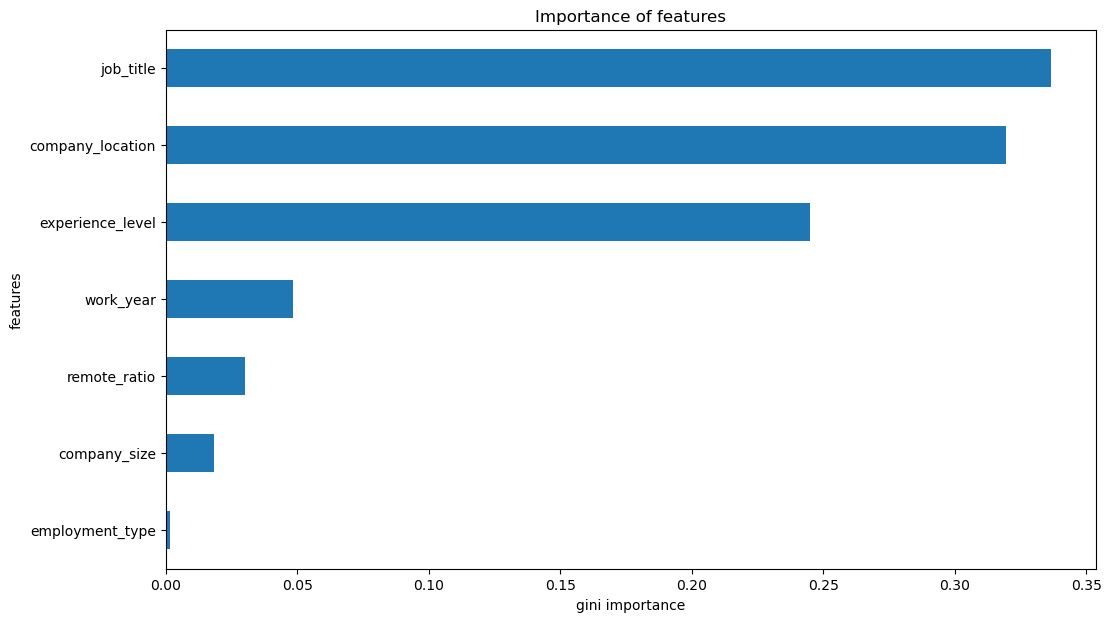

In [110]:
fig, ax = plt.subplots(1,1, figsize= (12, 7))
df_feat_imp.sort_values(by = 'feature importance', ascending=True).plot.barh(legend = False, ax=ax);
# label axis
plt.xlabel('gini importance')
plt.ylabel('features')
plt.title('Importance of features');

#### This observation suggests that job title is the most significant predictor of salary in the model, indicating that different job roles have a substantial impact on determining compensation levels. Conversely, employment type appears to have the least influence, implying that the nature of employment (e.g., full-time, part-time, contract) has relatively less bearing on salary predictions compared to other factors such as job title, experience level, or company attributes.

## Saving the Model

In [111]:
import pickle

In [112]:
df = {"model":model_r, "le_expl":le_expl, "le_empt":le_empt, "le_jobtitle":le_jobtitle, "le_compl":le_compl, "le_compz":le_compz}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(df, file)

In [113]:
with open('saved_steps.pkl', 'rb') as file:
    df = pickle.load(file)
model_loaded = df['model']
le_expl = df['le_expl']
le_empt = df['le_empt']
le_jobtitle = df['le_jobtitle']
le_compl = df['le_compl']
le_compz = df['le_compz']

In [114]:
y_predict=model_loaded.predict(p)
y_predict

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([134064.26470588])